# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


In [5]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
con = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))


In [20]:
import spotify
artist_id = "3TVXtAsR1Inumwj472S9r4"
result = con.artist_top_tracks(artist_id)

In [21]:
artist_id = '3TVXtAsR1Inumwj472S9r4'
response = sp.artist_top_tracks("3TVXtAsR1Inumwj472S9r4")
if response:
  tracks = response["tracks"]
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [18]:
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms                                     name  popularity
9     2.285700                                  No Face          77
6     5.319850  Rich Baby Daddy (feat. Sexyy Red & SZA)          78
8     3.661533                            Teenage Fever          78


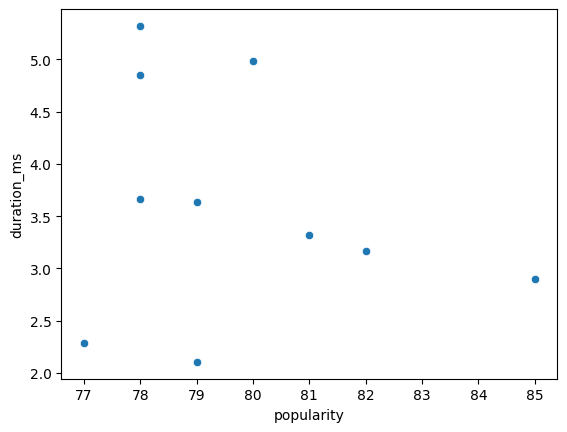

In [19]:
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")